In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import string
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import seaborn as sns
from Timeline import TimelineVisualiser
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv('../data/tweets.csv')

df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [4]:
df.drop(columns=df.columns.difference(['content', 'date_time']), inplace=True)

In [5]:
df.head()

,content,date_time
0,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52
1,@barackobama Thank you for your incredible gra...,11/01/2017 08:38
2,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22


In [6]:
df['date_time'] = pd.to_datetime(df.date_time)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    52542 non-null  object        
 1   date_time  52542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 821.1+ KB


In [8]:
def return_my_hashtag(series):
    content, date_time = series
    regex = r'#\w+'
    results = re.findall(regex, content)
    if len(results) > 0:
        return results
    return np.nan

In [9]:
df['hashtags'] = df.apply(return_my_hashtag, axis=1)

In [10]:
df

,content,date_time,hashtags
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,[#DONTNORMALIZEHATE]
1,@barackobama Thank you for your incredible gra...,2017-11-01 08:38:00,NaN
2,Life goals. https://t.co/XIn1qKMKQl,2017-11-01 02:52:00,NaN
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,2017-11-01 02:44:00,NaN
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,2017-10-01 05:22:00,NaN
...,...,...,...
52537,Life couldn't be better right now. 😊,2015-06-01 23:10:00,NaN
52538,First Monday back in action. I'd say 21.6 mile...,2015-06-01 02:17:00,NaN
52539,"Crime shows, buddy, snuggles = the perfect Sun...",2015-05-01 03:42:00,NaN
52540,❄️ http://t.co/sHCFdPpGPa,2015-05-01 00:06:00,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    52542 non-null  object        
 1   date_time  52542 non-null  datetime64[ns]
 2   hashtags   20561 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ MB


In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df = df.explode('hashtags')

In [14]:
df

,content,date_time,hashtags
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,#DONTNORMALIZEHATE
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01 01:00:00,#fourmoreyears
28,I dare you to find a better live vocal perform...,2016-01-12 07:08:00,#jenniferholliday
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#Thanksgiving
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#IStandWithStandingRock
...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01 08:17:00,#sleeptalking
52518,I guess you could say Buddy was pretty tired a...,2015-12-01 07:43:00,#whitegirlwasted
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01 06:35:00,#20FITteen
52530,I’m going to #color2015 with health and love 💪...,2015-10-01 01:19:00,#color2015


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    25818 non-null  object        
 1   date_time  25818 non-null  datetime64[ns]
 2   hashtags   25818 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 806.8+ KB


In [219]:
def process_tweets_and_get_sentiment(tweet):
    # remove all the RT
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hash signs
    tweet = re.sub(r'#', '', tweet)
    # remove mentions
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    # remove links
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove punctuation
    tweet = re.sub(r'['+string.punctuation+']+', ' ', tweet)

    # finally get the sentiment score
    blob = TextBlob(tweet, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment.polarity

In [220]:
df['sentiment'] = df.content.apply(process_tweets_and_get_sentiment)


**********************************************************************
  Resource movie_reviews not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('movie_reviews')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/movie_reviews

  Searched in:
    - 'C:\\Users\\aksha/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\envs\\thesis_dev\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\envs\\thesis_dev\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\envs\\thesis_dev\\lib\\nltk_data'
    - 'C:\\Users\\aksha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [244]:
df

,content,date_time,hashtags
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,#DONTNORMALIZEHATE
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01 01:00:00,#fourmoreyears
28,I dare you to find a better live vocal perform...,2016-01-12 07:08:00,#jenniferholliday
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#Thanksgiving
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#IStandWithStandingRock
...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01 08:17:00,#sleeptalking
52518,I guess you could say Buddy was pretty tired a...,2015-12-01 07:43:00,#whitegirlwasted
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01 06:35:00,#20FITteen
52530,I’m going to #color2015 with health and love 💪...,2015-10-01 01:19:00,#color2015


In [245]:
df.hashtag.unique()

AttributeError: 'DataFrame' object has no attribute 'hashtag'

In [246]:
df.date_time = df.date_time.dt.date

In [247]:
df

,content,date_time,hashtags
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01,#DONTNORMALIZEHATE
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01,#fourmoreyears
28,I dare you to find a better live vocal perform...,2016-01-12,#jenniferholliday
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#Thanksgiving
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#IStandWithStandingRock
...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01,#sleeptalking
52518,I guess you could say Buddy was pretty tired a...,2015-12-01,#whitegirlwasted
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01,#20FITteen
52530,I’m going to #color2015 with health and love 💪...,2015-10-01,#color2015


<AxesSubplot:>

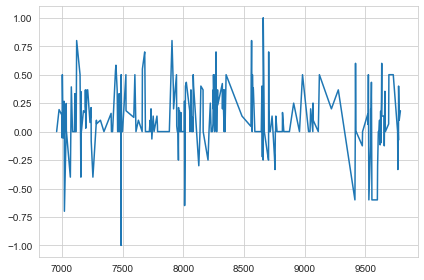

In [22]:
df[df.hashtag == '#ActOnClimate']['sentiment'].plot(x='date_time', y='sentiment')

In [197]:
def generate_my_sentiment(hashtag_to_plot: str):
    fig, ax = plt.subplots(figsize=(15, 8))
    temp_df = df[df.hashtag == hashtag_to_plot]
    x_axis = sorted(temp_df.date_time.tolist())
    sns.lineplot(data=df[df.hashtag == hashtag_to_plot], x='date_time', y='sentiment', ax=ax, ci=False)
    # ax.axhline(0, color='black', linewidth=1)
    # ax.text(s='Neutral',x=x_axis[0], y=0.01, fontdict={'fontsize': 15, 'fontweight': 500})
    ax.set_title(f'Sentiment analysis of tweets with the hashtag {hashtag_to_plot}', fontdict={'fontsize': 15, 'fontweight': 500})
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Score')

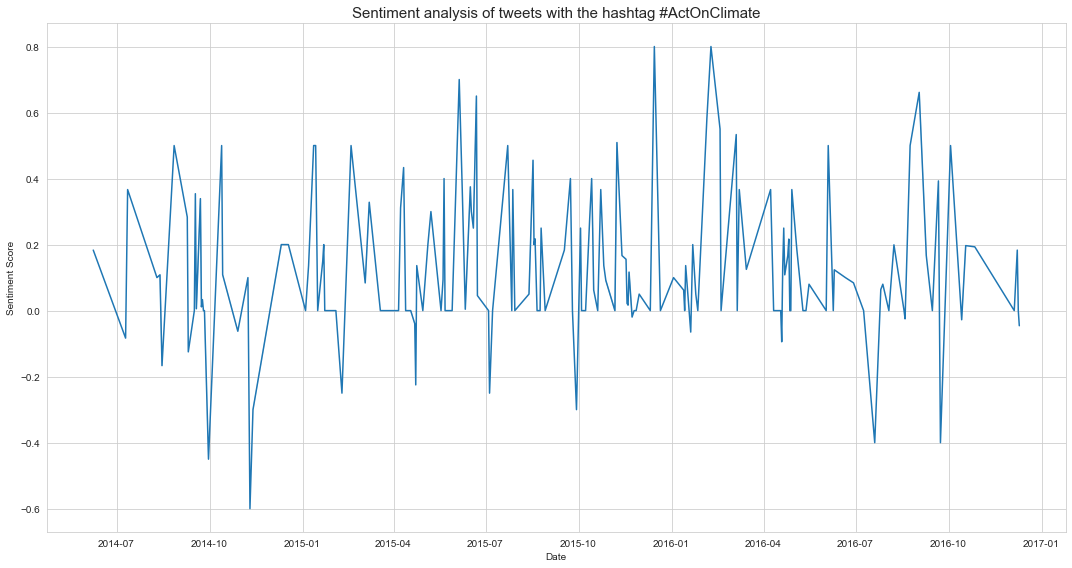

In [198]:
generate_my_sentiment('#ActOnClimate')

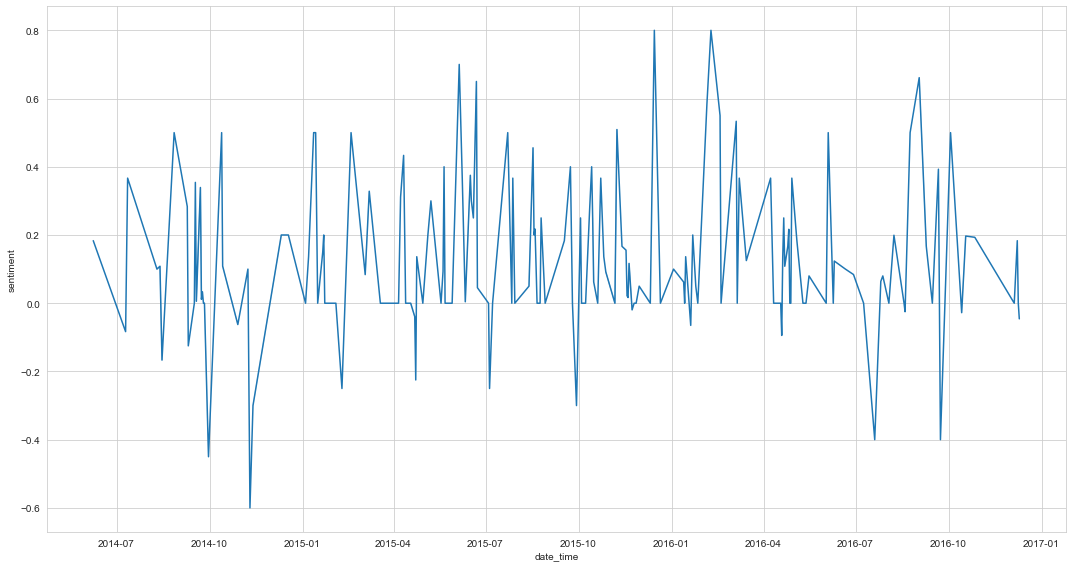

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=df[df.hashtag == '#ActOnClimate'], x='date_time', y='sentiment', ax=ax, ci=False)
ax.plot()
ax.text()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   content    25818 non-null  object 
 1   date_time  25818 non-null  object 
 2   hashtag    25818 non-null  object 
 3   sentiment  25818 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1008.5+ KB


In [15]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    25818 non-null  object        
 1   date_time  25818 non-null  datetime64[ns]
 2   hashtags   25818 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 806.8+ KB


In [17]:
df['year'] = df.date_time.dt.year

In [18]:
df

,content,date_time,hashtags,year
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,#DONTNORMALIZEHATE,2017
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01 01:00:00,#fourmoreyears,2017
28,I dare you to find a better live vocal perform...,2016-01-12 07:08:00,#jenniferholliday,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#Thanksgiving,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#IStandWithStandingRock,2016
...,...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01 08:17:00,#sleeptalking,2015
52518,I guess you could say Buddy was pretty tired a...,2015-12-01 07:43:00,#whitegirlwasted,2015
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01 06:35:00,#20FITteen,2015
52530,I’m going to #color2015 with health and love 💪...,2015-10-01 01:19:00,#color2015,2015


In [31]:
df.groupby(by='year')['hashtag'].value_counts()

year  hashtag       
2009  #appwednesday      2
2010  #worldcup         23
      #POR              16
      #NewTwitter        8
      #newtwitter        7
                        ..
2017  #raiseit           1
      #retweettovote     1
      #tagheuer          1
      #truetho           1
      #unfuckwitable     1
Name: hashtag, Length: 9625, dtype: int64

In [32]:
df_grouped = df.loc[:, ['year', 'hashtag']].groupby(by='year').value_counts()

In [33]:
df_grouped

year  hashtag            
2009  #appwednesday           2
2010  #worldcup              23
      #POR                   16
      #NewTwitter             8
      #newtwitter             7
                             ..
2017  #LiveByNight            1
      #KingsDecade            1
      #KickOffForKindness     1
      #JustDoIt               1
      #JetLagProblems         1
Length: 9625, dtype: int64

In [34]:
df_grouped_frame = df_grouped.to_frame()

In [35]:
unique_year = df.year.unique().tolist()

In [36]:
year_quantile = {}

In [37]:
for year in unique_year:
    year_quantile[year] = np.quantile(df_grouped[year].values, 0.99)

In [38]:
year_quantile

{2017: 11.279999999999973,
 2016: 35.0,
 2015: 30.679999999999836,
 2014: 29.40000000000009,
 2013: 20.40000000000009,
 2012: 16.519999999999982,
 2011: 14.779999999999632,
 2010: 17.469999999999956,
 2009: 2.0}

In [39]:
df_grouped_frame.columns = ['count_value']

In [40]:
df_grouped_frame

count_value
year hashtag                         
2009 #appwednesday                  2
2010 #worldcup                     23
     #POR                          16
     #NewTwitter                    8
     #newtwitter                    7
...                               ...
2017 #LiveByNight                   1
     #KingsDecade                   1
     #KickOffForKindness            1
     #JustDoIt                      1
     #JetLagProblems                1

[9625 rows x 1 columns]

In [41]:
final_df = pd.DataFrame(columns=['year', 'event'])

In [42]:
final_df

,year,event


In [43]:
year_event = {'year': [], 'event': []}

In [44]:
def generate_hashtags_on_quantiles(df_to_process: pd.DataFrame):
    for year in sorted(unique_year):
        print(year)
        temp_df = df_to_process.loc[year]
        events = [f'{key}({value.count_value})' for key, value in temp_df[temp_df['count_value'] > year_quantile[year]][:10].iterrows()]
        if len(events) > 0:
            year_event['year'].append(year)
            year_event['event'].append(', '.join(events))

In [45]:
generate_hashtags_on_quantiles(df_grouped_frame)

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [46]:
year_event

{'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
 'event': ['#worldcup(23)',
  '#InTime(46), #askjt(38)',
  '#UNAPOLOGETIC(65), #AddictedToYou(42), #AskJT(38), #Celebrate15M(33), #TroubleWithTheCurve(31), #GetItStarted(19), #RED(17)',
  '#The2020Experience(75), #LateNight(72), #PRISM(66), #2of2(63), #ROAR(63), #BritneyJeanListeningParty(58), #TeamShakira(53), #LNJF(52), #IAmBritneyJean(42), #finderskeepers(39)',
  '#FallonTonight(321), #TS1989(165), #taylurking(125), #fallonmono(99), #JT2020Tour(83), #CheekToCheek(61), #CantRememberToForgetYou(60), #BestOfFallon(59), #ImmigrationAction(54), #ActOnClimate(50)',
  '#FallonTonight(370), #ActOnClimate(132), #CONFIDENT(116), #TBT(86), #PURPOSE(63), #WhatDoYouMean(62), #IranDeal(52), #SOTU(50), #YouTubeRewind(47), #AskDemi(46)',
  '#FallonTonight(361), #DailyFluff(215), #LoveTwitter(166), #DoYourJob(147), #voteIRL(97), #CantStopTheFeeling(96), #TheWeekOnInstagram(95), #ActOnClimate(95), #TBT(87), #YouTubeRewind(74)',
  '#GoldenGlob

In [47]:
df_final = pd.DataFrame.from_dict(year_event)

In [48]:
df_final

,year,event
0,2010,#worldcup(23)
1,2011,"#InTime(46), #askjt(38)"
2,2012,"#UNAPOLOGETIC(65), #AddictedToYou(42), #AskJT(..."
3,2013,"#The2020Experience(75), #LateNight(72), #PRISM..."
4,2014,"#FallonTonight(321), #TS1989(165), #taylurking..."
5,2015,"#FallonTonight(370), #ActOnClimate(132), #CONF..."
6,2016,"#FallonTonight(361), #DailyFluff(215), #LoveTw..."
7,2017,"#GoldenGlobes(14), #FallonTonight(12)"


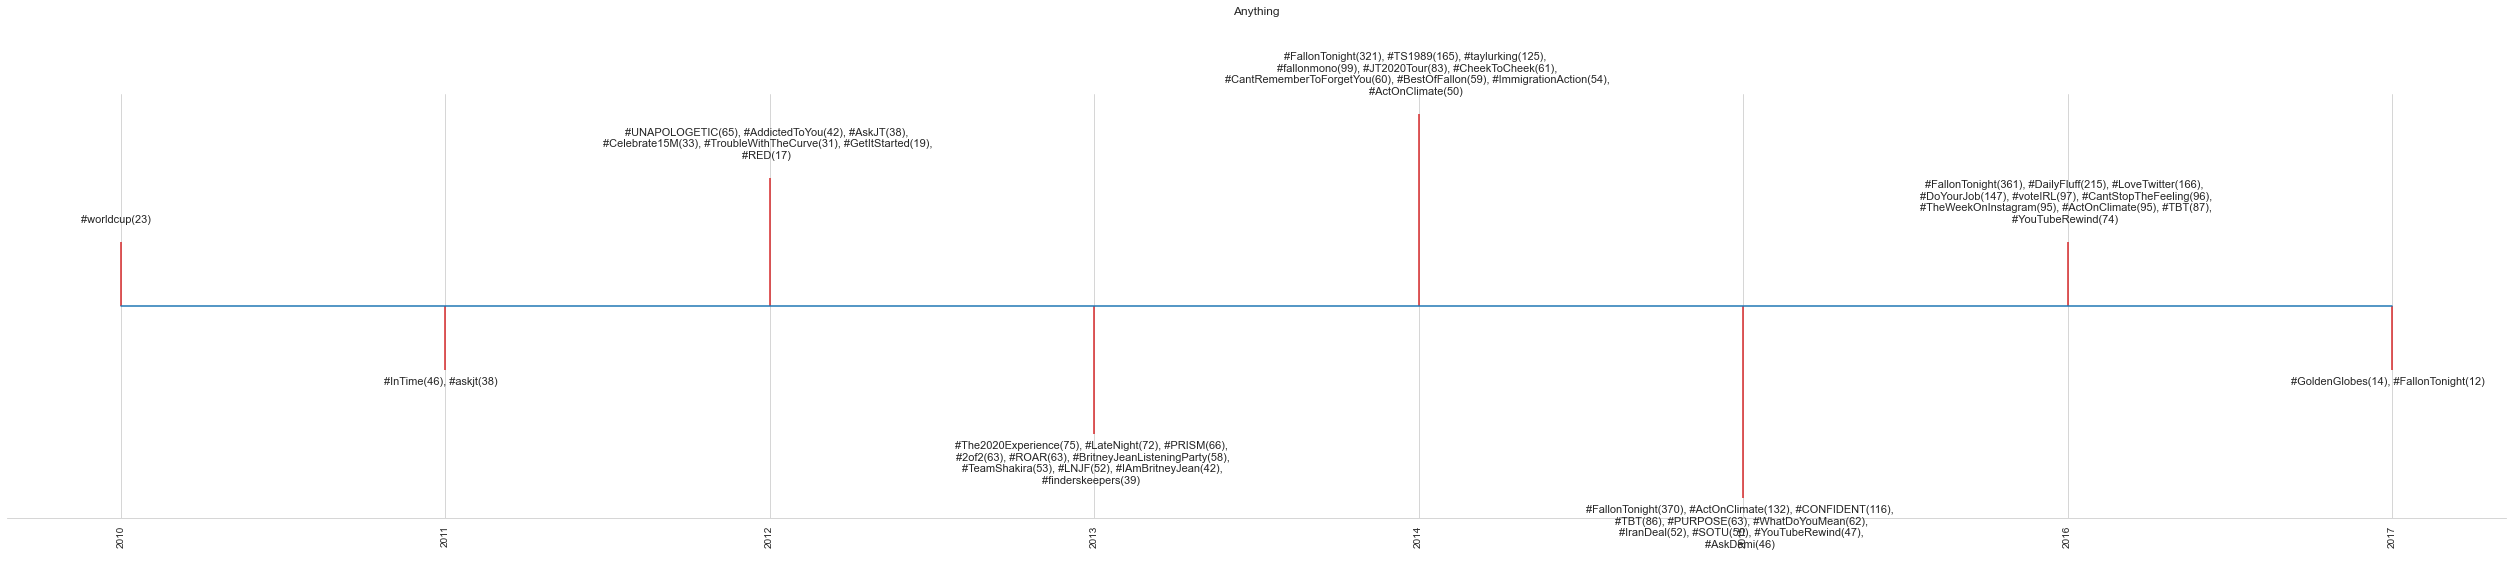

In [49]:
TimelineVisualiser(df_final, 'Anything').create_my_timeline()

In [50]:
df_grouped_2 = df.loc[:, ['year', 'hashtag']].groupby(by=['hashtag', 'year']).value_counts().to_frame()

In [51]:
df_grouped_2.columns = ['value_count']

In [52]:
df_grouped_2

value_count
hashtag     year             
#1          2010            1
            2011            4
            2012           14
            2013           28
            2014           46
...                       ...
#zoesaldana 2014            1
#zoolander  2015            1
#さようなら      2014            1
#日食         2012            1
#안녕하세요      2014            1

[9625 rows x 1 columns]

In [53]:
def print_anything(series):
    print(series)
    print('++============================')

In [54]:
all_hashtags = df.hashtag.unique().tolist()

In [55]:
all_hashtags

['#DONTNORMALIZEHATE',
 '#fourmoreyears',
 '#jenniferholliday',
 '#Thanksgiving',
 '#IStandWithStandingRock',
 '#thanksgivingdayclapback',
 '#LOVETRUMPSHATE',
 '#Yeson64',
 '#HERstory',
 '#november8th',
 '#LoveTrumpsHate',
 '#IMWITHME',
 '#childrenfirst',
 '#debates',
 '#ad',
 '#DEBATES',
 '#debate',
 '#earlyvoting',
 '#karlbecker',
 '#1',
 '#KarlBecker',
 '#DROPTHEMICHRC',
 '#YOUGOTTHIS',
 '#GETTOTHEPOLICIES',
 '#YOUGOTTHISHRC',
 '#Debates',
 '#happyhalloween',
 '#NSFW',
 '#VoteHoney',
 '#VoterRegistrationDay',
 '#IRegistered',
 '#shesgotthis',
 '#ImWithHer',
 '#debatenight',
 '#mudslingmonday',
 '#moreshame',
 '#idcimwriting',
 '#helovesmeforme',
 '#BuyPerfectIllusionOniTunes',
 '#FFADAYO',
 '#RISE',
 '#TBT',
 '#KATYxCOVERGIRL',
 '#StandWithLeslie',
 '#MakingofRise',
 '#Rio2016',
 '#proudfeminist',
 '#DemsInPhilly',
 '#RISING',
 '#KatyKatHouse',
 '#rose',
 '#purple',
 '#RNCinCLE',
 '#rise',
 '#ALTONSTERLING',
 '#FightUnfair',
 '#ForEveryChild',
 '#CLOSER',
 '#StaplesForStudents',
 '#

In [56]:
df_grouped_2.loc['#1']

,value_count
year,
2010,1
2011,4
2012,14
2013,28
2014,46
2015,33
2016,35
2017,1


In [57]:
peaks = find_peaks(df_grouped_2.loc['#1'].value_count)

In [58]:
list(peaks[0])

[4, 6]

In [59]:
for key, value in df_grouped_2.loc['#1'].iloc[list(peaks[0])].iterrows():
    print(key)
    print(value.value_count)

2014
46
2016
35


In [60]:
final_time_series_dict = {}
def get_by_time_series(df_to_process: pd.DataFrame):
    for hash in all_hashtags:
        temp_df = df_to_process.loc[hash]
        peaks = find_peaks(temp_df.value_count)
        if len(peaks[0]) > 0:
            for key, value in temp_df.iloc[list(peaks[0])].iterrows():
                if key not in final_time_series_dict:
                    final_time_series_dict[key] = [f'{hash}({value.value_count})']
                else:
                    final_time_series_dict[key].append(f'{hash}({value.value_count})')
            # print(hash)
            # print(peaks)
            # print(temp_df.iloc[list(peaks[0])])


In [61]:
get_by_time_series(df_grouped_2)

In [62]:
final_time_series_dict

{2014: ['#1(46)',
  '#THEPRISMATICWORLDTOUR(14)',
  '#tbt(8)',
  '#hashtag(3)',
  '#BBMAs(9)',
  '#GRAMMYs(4)',
  '#GivingTuesday(4)',
  '#thankyou(2)',
  '#LaborDay(3)',
  '#Navy(5)',
  '#BRA(8)',
  '#USA(5)',
  '#Oscars(11)',
  '#JT2020Tour(83)',
  '#Finderskeepers(12)',
  '#PieceOfMe(33)',
  '#Mercurial(6)',
  '#halamadrid(6)',
  '#HalaMadrid(10)',
  '#ThankYouNotes(19)',
  '#FallonMono(5)',
  '#fallonmono(99)',
  '#thankyounotefriday(18)'],
 2016: ['#1(35)',
  '#TBT(87)',
  '#Company(4)',
  '#iHeartAwards(11)',
  '#PCAs(7)',
  '#MLKDay(5)',
  '#FENTYXPUMA(7)',
  '#TravelTuesday(25)',
  '#PieceOfMe(46)',
  '#DontCrackUnderPressure(3)',
  '#JustDoIt(2)',
  '#Mercurial(16)',
  '#ThankYouNoteFriday(38)',
  '#WeeklyFluff(47)',
  '#Lovatics(3)'],
 2015: ['#blessed(4)',
  '#FBF(14)',
  '#6(2)',
  '#2(6)',
  '#SuperBowl(4)',
  '#sorrynotsorry(3)',
  '#AMAs(11)',
  '#family(3)',
  '#iHeartRadio(4)',
  '#vmas(5)',
  '#Emmys(16)',
  '#DWTS(5)',
  '#Obamacare(37)',
  '#ActOnClimate(132)',
  '#

In [63]:
final_df_dict = {'year': [], 'event': []}

In [64]:
for key, items in final_time_series_dict.items():
    final_df_dict['year'].append(key)
    final_df_dict['event'].append(', '.join(sorted(items, key= lambda item: int(re.findall(r'[0-9]+', re.findall(r'\([0-9]+\)', item)[0])[0]), reverse=True)[:10]))


In [65]:
df_time_series = pd.DataFrame.from_dict(final_df_dict)

In [66]:
df_time_series

,year,event
0,2014,"#fallonmono(99), #JT2020Tour(83), #1(46), #Pie..."
1,2016,"#TBT(87), #WeeklyFluff(47), #PieceOfMe(46), #T..."
2,2015,"#FallonTonight(370), #ActOnClimate(132), #GetC..."
3,2013,"#TeamShakira(53), #youneverknow(27), #AMAs(16)..."
4,2012,"#2(5), #Oscars(4), #VMA(2)"
5,2011,"#FF(4), #7(2)"


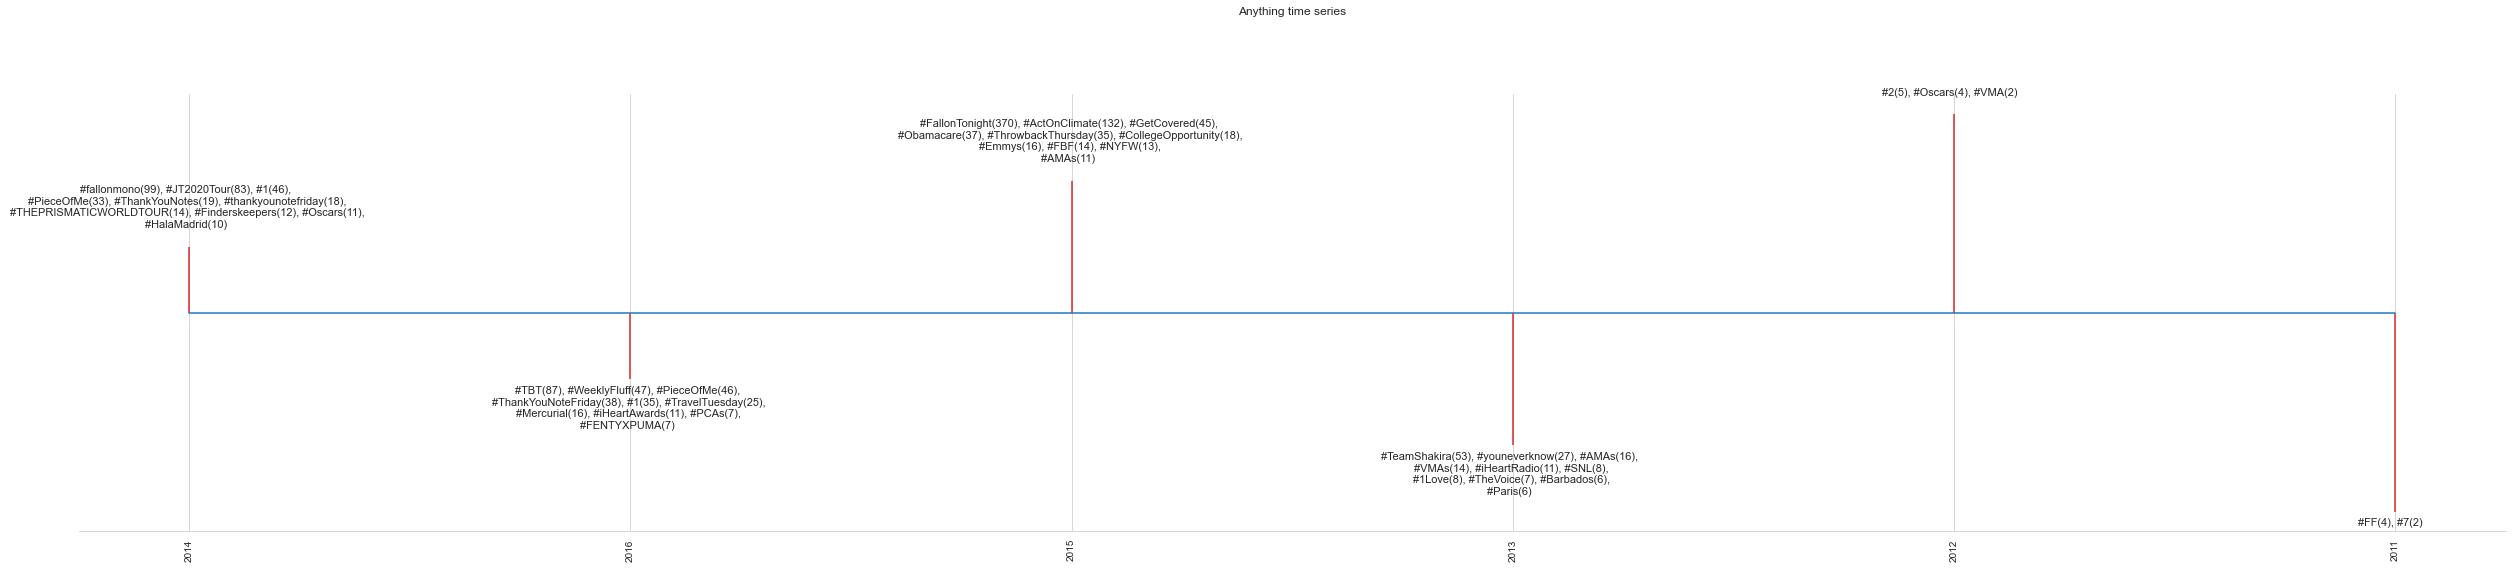

In [67]:
TimelineVisualiser(df_time_series, 'Anything time series').create_my_timeline()

In [68]:
def __generate_quantile_all(month='May'):
    print('generating grouped hashtags')
    temp_df = df.copy()
    temp_df['month'] = temp_df.month_year.dt.month
    temp_df = temp_df[temp_df['month'] == 5]
    df_grouped = temp_df.loc[:, ['month_year', 'hashtags']].groupby(by='month_year').value_counts().to_frame()
    unique_values = temp_df.month_year.unique().tolist()
    value_quantile = {}
    for value_month in unique_values:
        value_quantile[value_month] = np.quantile(df_grouped.loc[value_month].values, 0.99)
    df_grouped.columns = ['count_value']
    value_event = {'month': [], 'event': []}
    for value in sorted(unique_values):
        print(value)
        temp_df = df_grouped.loc[value]
        events = [f'{key}({value.count_value})' for key, value in
                  temp_df[temp_df['count_value'] > value_quantile[value]][:10].iterrows()]
        if len(events) > 0:
            value_event['year'].append(year)
            value_event['event'].append(', '.join(events))

    df_final = pd.DataFrame.from_dict(year_event)
    TimelineVisualiser(df_final, 'Usage of prominent hashtag over the years').create_my_timeline()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 0 to 52531
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   content    25818 non-null  object        
 1   date_time  25818 non-null  datetime64[ns]
 2   hashtag    25818 non-null  object        
 3   sentiment  25818 non-null  float64       
 4   year       25818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [222]:
df['date_time'] = pd.to_datetime(df.date_time)

In [223]:
df['month_year'] = df['date_time'].dt.to_period('M')

In [224]:
temp_df = df.copy()
temp_df['month'] = temp_df.month_year.dt.month
temp_df = temp_df[temp_df['month'] == 5]
temp_df

,content,date_time,hashtag,month_year,month
402,H70thBD to my inspo Freddie Mercury❗Give some ...,2016-05-09 21:23:00,#FFADAYO,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08 21:17:00,#Rio2016,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08 21:17:00,#RISE,2016-05,5
430,"ALSO, you can watch the video in its entirety ...",2016-05-08 00:28:00,#Rio2016,2016-05,5
431,"Through the blood, sweat (lots of it), and tea...",2016-05-08 00:04:00,#RISE,2016-05,5
...,...,...,...,...,...
52173,Oh the sacrifices for fitness... 💪🏼 #allergies...,2015-05-18 06:03:00,#allergiesschmallergies,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05 00:12:00,#NMM,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05 00:12:00,#nomakeup,2015-05,5
52281,Now it's time for the gym with the one and onl...,2015-05-04 15:07:00,#BeastMode,2015-05,5


In [225]:
unique_values = temp_df.month_year.unique().tolist()

In [226]:
sorted(unique_values)

[Period('2010-05', 'M'),
 Period('2011-05', 'M'),
 Period('2012-05', 'M'),
 Period('2013-05', 'M'),
 Period('2014-05', 'M'),
 Period('2015-05', 'M'),
 Period('2016-05', 'M'),
 Period('2017-05', 'M')]

In [227]:
def __generate_quantile_specific_month(month=5):
    print(month)
    print('generating grouped hashtags')
    temp_df = df.copy()
    temp_df['month'] = temp_df.month_year.dt.month
    temp_df = temp_df[temp_df['month'] == month]
    df_grouped = temp_df.loc[:, ['month_year', 'hashtag']].groupby(by='month_year').value_counts().to_frame()
    unique_values = temp_df.month_year.unique().tolist()
    value_quantile = {}
    for value_month in unique_values:
        value_quantile[value_month] = np.quantile(df_grouped.loc[value_month].values, 0.99)
    df_grouped.columns = ['count_value']
    value_event = {'month': [], 'event': []}
    for value in sorted(unique_values):
        print(value)
        temp_df = df_grouped.loc[value]
        events = [f'{key}({value.count_value})' for key, value in
                  temp_df[temp_df['count_value'] > value_quantile[value]][:10].iterrows()]
        if len(events) > 0:
            value_event['month'].append(value)
            value_event['event'].append(', '.join(events))
    df_final = pd.DataFrame.from_dict(value_event)
    TimelineVisualiser(df_final, f'Usage of prominent hashtag over month {5}', timeline_key='month').create_my_timeline()

5
generating grouped hashtags
2010-05
2011-05
2012-05
2013-05
2014-05
2015-05
2016-05
2017-05


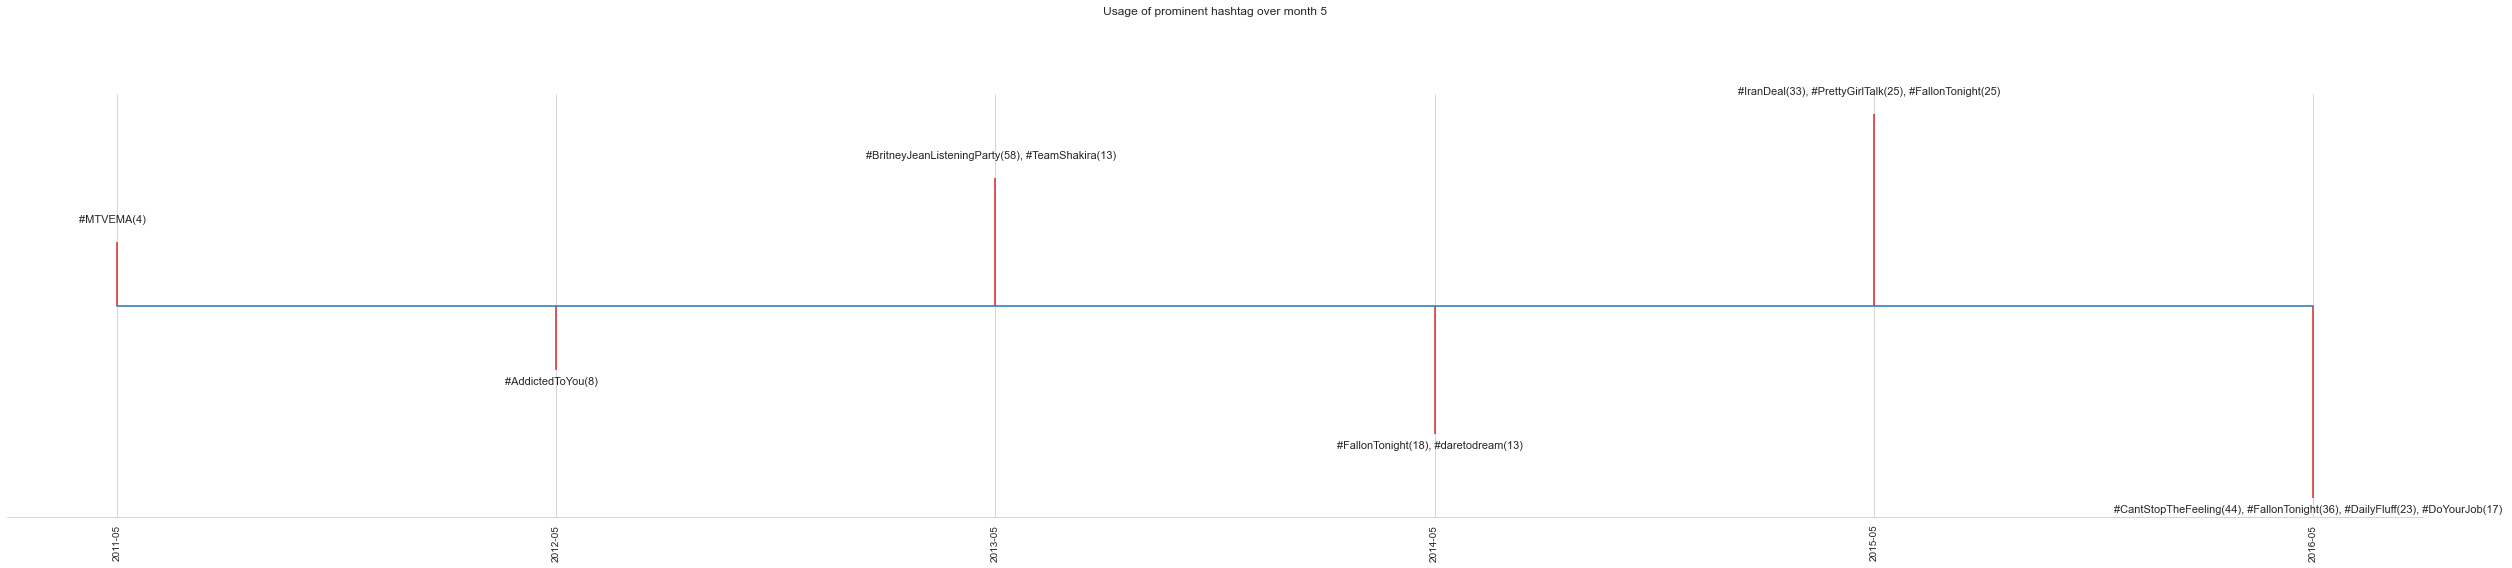

In [228]:
__generate_quantile_specific_month(5)

In [117]:
temp_df = df.copy()
temp_df['month'] = temp_df.month_year.dt.month
temp_df = temp_df[temp_df['month'] == 5]

In [118]:
temp_df

,content,date_time,hashtag,sentiment,year,month_year,month
402,H70thBD to my inspo Freddie Mercury❗Give some ...,2016-05-09,#FFADAYO,0.000000,2016,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08,#Rio2016,0.200000,2016,2016-05,5
420,#Rio2016 ARE YOU READY TO #RISE https://t.co/Q...,2016-05-08,#RISE,0.200000,2016,2016-05,5
430,"ALSO, you can watch the video in its entirety ...",2016-05-08,#Rio2016,0.357143,2016,2016-05,5
431,"Through the blood, sweat (lots of it), and tea...",2016-05-08,#RISE,0.136364,2016,2016-05,5
...,...,...,...,...,...,...,...
52173,Oh the sacrifices for fitness... 💪🏼 #allergies...,2015-05-18,#allergiesschmallergies,0.000000,2015,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05,#NMM,-0.329167,2015,2015-05,5
52193,#NMM (a little late I know.. so sorry!!!!) Any...,2015-05-05,#nomakeup,-0.329167,2015,2015-05,5
52281,Now it's time for the gym with the one and onl...,2015-05-04,#BeastMode,0.000000,2015,2015-05,5


In [119]:
df_grouped = temp_df.loc[:, ['month_year', 'hashtag']].groupby(by='month_year').value_counts().to_frame()

In [120]:
df_grouped

0
month_year hashtag           
2010-05    #MusicMonday     1
2011-05    #MTVEMA          4
           #AskObama        1
           #BangBangBang    1
           #Belfast         1
...                        ..
2017-05    #Chantaje        1
           #GoldenGlobes    1
           #HondaCivicTour  1
           #LittleMonsters  1
           #TBT             1

[1115 rows x 1 columns]

In [89]:
unique_values = temp_df.month_year.unique().tolist()

In [ ]:
value_quantile = {}
for value_month in unique_values:
    print(df_grouped.loc[value_month].values)
    value_quantile[value_month] = np.quantile(df_grouped.loc[value_month].values, 0.99)

In [107]:
value_quantile

{Period('2016-05', 'M'): 5.509999999999991,
 Period('2015-05', 'M'): 6.580000000000041,
 Period('2014-05', 'M'): 5.389999999999986,
 Period('2013-05', 'M'): 4.360000000000014,
 Period('2011-05', 'M'): 1.0,
 Period('2012-05', 'M'): 3.1999999999999886,
 Period('2017-05', 'M'): 2.0,
 Period('2010-05', 'M'): 1.0}

In [106]:
df_grouped.columns = ['count_value']

In [48]:
temp_df = df.copy()
df_grouped = temp_df.loc[:, ['year', 'hashtags']].groupby(by='year').value_counts().to_frame()
unique_year = temp_df.year.unique().tolist()
year_quantile = {}
for year in unique_year:
    year_quantile[year] = np.quantile(df_grouped.loc[year].values, 0.99)
df_grouped.columns = ['count_value']
year_event = {'year': [], 'event': []}


In [49]:
df_grouped

count_value
year hashtags                        
2009 #appwednesday                  2
2010 #worldcup                     23
     #POR                          16
     #NewTwitter                    8
     #newtwitter                    7
...                               ...
2017 #LiveByNight                   1
     #KingsDecade                   1
     #KickOffForKindness            1
     #JustDoIt                      1
     #JetLagProblems                1

[9625 rows x 1 columns]

In [50]:
for year in sorted(unique_year):
    print(year)
    temp_df = df_grouped.loc[year]
    events = [f'{key}({value.count_value})' for key, value in
              temp_df[temp_df['count_value'] > year_quantile[year]][:10].iterrows()]
    if len(events) > 0:
        year_event['year'].append(year)
        year_event['event'].append(events)

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [51]:
year_event

{'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
 'event': [['#worldcup(23)'],
  ['#InTime(46)', '#askjt(38)'],
  ['#UNAPOLOGETIC(65)',
   '#AddictedToYou(42)',
   '#AskJT(38)',
   '#Celebrate15M(33)',
   '#TroubleWithTheCurve(31)',
   '#GetItStarted(19)',
   '#RED(17)'],
  ['#The2020Experience(75)',
   '#LateNight(72)',
   '#PRISM(66)',
   '#2of2(63)',
   '#ROAR(63)',
   '#BritneyJeanListeningParty(58)',
   '#TeamShakira(53)',
   '#LNJF(52)',
   '#IAmBritneyJean(42)',
   '#finderskeepers(39)'],
  ['#FallonTonight(321)',
   '#TS1989(165)',
   '#taylurking(125)',
   '#fallonmono(99)',
   '#JT2020Tour(83)',
   '#CheekToCheek(61)',
   '#CantRememberToForgetYou(60)',
   '#BestOfFallon(59)',
   '#ImmigrationAction(54)',
   '#ActOnClimate(50)'],
  ['#FallonTonight(370)',
   '#ActOnClimate(132)',
   '#CONFIDENT(116)',
   '#TBT(86)',
   '#PURPOSE(63)',
   '#WhatDoYouMean(62)',
   '#IranDeal(52)',
   '#SOTU(50)',
   '#YouTubeRewind(47)',
   '#AskDemi(46)'],
  ['#FallonTonight(361)',
 

In [52]:
df_final = pd.DataFrame.from_dict(year_event)

In [53]:
# df_final = df_final.explode('event')

In [54]:
def remove_hashtag(tweets):
    return r', '.join([tweet[1:] for tweet in tweets])

In [55]:
df_final['event'] = df_final.event.apply(remove_hashtag)

In [56]:
df_final

,year,event
0,2010,worldcup(23)
1,2011,"InTime(46), askjt(38)"
2,2012,"UNAPOLOGETIC(65), AddictedToYou(42), AskJT(38)..."
3,2013,"The2020Experience(75), LateNight(72), PRISM(66..."
4,2014,"FallonTonight(321), TS1989(165), taylurking(12..."
5,2015,"FallonTonight(370), ActOnClimate(132), CONFIDE..."
6,2016,"FallonTonight(361), DailyFluff(215), LoveTwitt..."
7,2017,"GoldenGlobes(14), FallonTonight(12)"


In [61]:
df_final.iloc[0].event = r'\textcolor{red}{easily}'

C:\Users\aksha\AppData\Local\Temp\ipykernel_12316\4009731571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.iloc[0].event = r'\textcolor{red}{easily}'


In [65]:
df_final = df_final.copy()
df_final.at[0, 'event'] = r'\textcolor{red}{easily}'

In [66]:
df_final

,year,event
0,2010,\textcolor{red}{easily}
1,2011,"InTime(46), askjt(38)"
2,2012,"UNAPOLOGETIC(65), AddictedToYou(42), AskJT(38)..."
3,2013,"The2020Experience(75), LateNight(72), PRISM(66..."
4,2014,"FallonTonight(321), TS1989(165), taylurking(12..."
5,2015,"FallonTonight(370), ActOnClimate(132), CONFIDE..."
6,2016,"FallonTonight(361), DailyFluff(215), LoveTwitt..."
7,2017,"GoldenGlobes(14), FallonTonight(12)"


In [71]:
temp_df = df.copy()

In [72]:
temp_df

,content,date_time,hashtags,year
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01 19:52:00,#DONTNORMALIZEHATE,2017
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01 01:00:00,#fourmoreyears,2017
28,I dare you to find a better live vocal perform...,2016-01-12 07:08:00,#jenniferholliday,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#Thanksgiving,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24 22:31:00,#IStandWithStandingRock,2016
...,...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01 08:17:00,#sleeptalking,2015
52518,I guess you could say Buddy was pretty tired a...,2015-12-01 07:43:00,#whitegirlwasted,2015
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01 06:35:00,#20FITteen,2015
52530,I’m going to #color2015 with health and love 💪...,2015-10-01 01:19:00,#color2015,2015


In [73]:
temp_df['date_time'] = temp_df.date_time.dt.date

In [75]:
temp_df

,content,date_time,hashtags,year
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01,#DONTNORMALIZEHATE,2017
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01,#fourmoreyears,2017
28,I dare you to find a better live vocal perform...,2016-01-12,#jenniferholliday,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#Thanksgiving,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#IStandWithStandingRock,2016
...,...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01,#sleeptalking,2015
52518,I guess you could say Buddy was pretty tired a...,2015-12-01,#whitegirlwasted,2015
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01,#20FITteen,2015
52530,I’m going to #color2015 with health and love 💪...,2015-10-01,#color2015,2015


In [95]:
def plot_time_series(hashtagd):
    new_df = temp_df[temp_df['hashtags'] == hashtagd]
    temp = new_df.groupby('year').count().reset_index().iloc[:, [0, 1]]
    plt.plot(temp.iloc[:, 0], temp.iloc[:, 1])

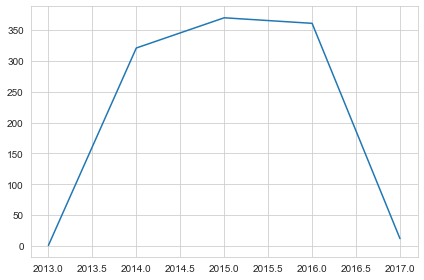

In [96]:
plot_time_series('#FallonTonight')

In [97]:
temp_df

,content,date_time,hashtags,year
0,Is history repeating itself...?#DONTNORMALIZEH...,2017-12-01,#DONTNORMALIZEHATE,2017
5,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,2017-09-01,#fourmoreyears,2017
28,I dare you to find a better live vocal perform...,2016-01-12,#jenniferholliday,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#Thanksgiving,2016
29,This #Thanksgiving #IStandWithStandingRock tex...,2016-11-24,#IStandWithStandingRock,2016
...,...,...,...,...
52516,"""These are real pajamas."" ""Huh??"" ""You asked m...",2015-12-01,#sleeptalking,2015
52518,I guess you could say Buddy was pretty tired a...,2015-12-01,#whitegirlwasted,2015
52526,"Well, I didn't end up getting any brownie batt...",2015-11-01,#20FITteen,2015
52530,I’m going to #color2015 with health and love 💪...,2015-10-01,#color2015,2015
